In [1]:
library(Seurat)
library(ggplot2)
library(patchwork)
library(dplyr)
library(shiny)
library(hdf5r)

Attaching SeuratObject

Attaching sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: Error in library(SeuratData): there is no package called ‘SeuratData’


In [3]:
#spatial 
data_dir1 = "../../shared-classes/materials/biol8803e/team2/song-file/Anterior/spatial"

data_dir2 = "../../shared-classes/materials/biol8803e/team2/song-file/Anterior"


Anterior.brain = Seurat::Read10X_Image(data_dir1, image.name = 'tissue_lowres_image.png')
brain1 = Load10X_Spatial(data.dir=data_dir2,
                        filename = 'V1_Mouse_Brain_Sagittal_Anterior_Section_2_filtered_feature_bc_matrix.h5',
                        assay='Spatial',
                        slice='slice1',
                        image = Anterior.brain
)


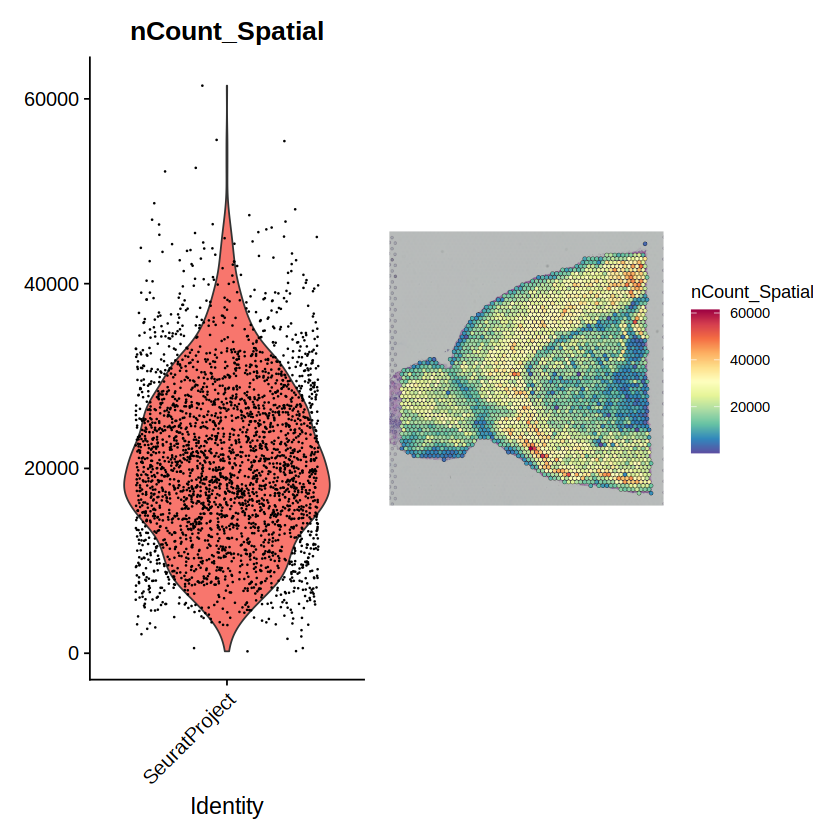

In [4]:
plot1 <- VlnPlot(brain1, features = "nCount_Spatial", pt.size = 0.1) + NoLegend()
plot2 <- SpatialFeaturePlot(brain1, features = "nCount_Spatial") + theme(legend.position = "right")
wrap_plots(plot1, plot2)

In [5]:
brain1@project.name <-"anterior"
Idents(brain1) <-"anterior"
brain1$orig.ident <-"anterior"

In [6]:
brain1 <- SCTransform(brain1, assay = "Spatial", verbose = FALSE)

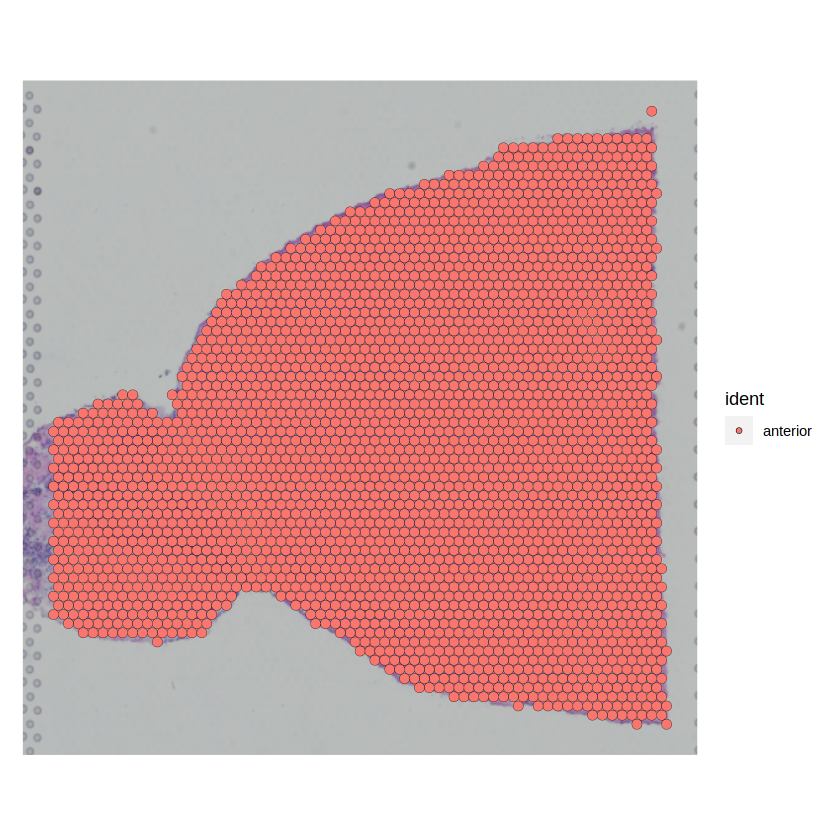

In [7]:
SpatialDimPlot(brain1)

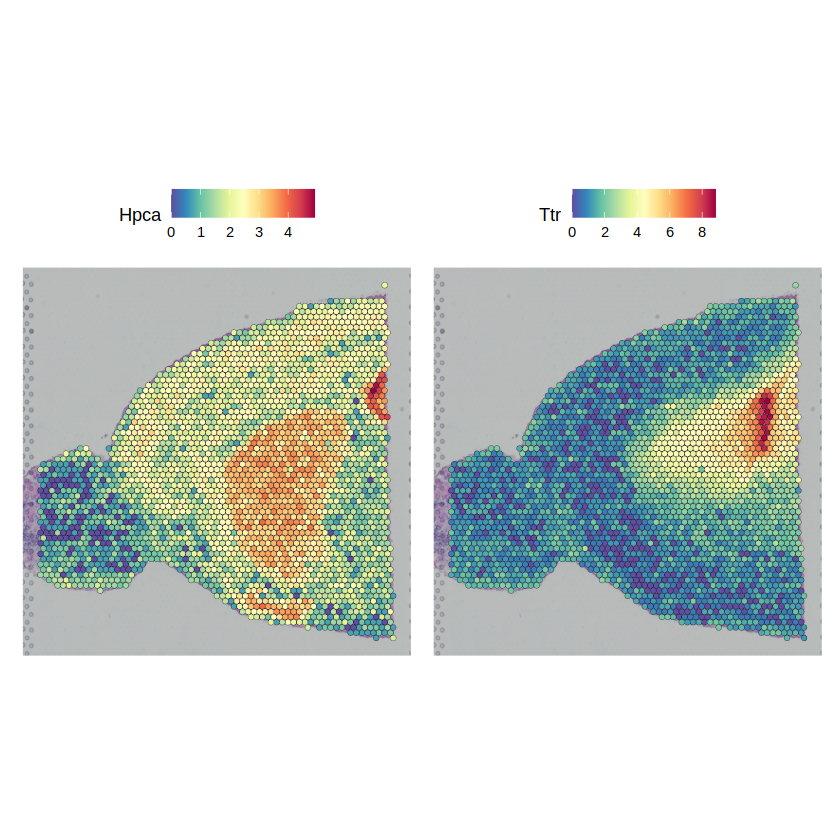

In [8]:
#Rshinny
SpatialFeaturePlot(brain1, features = c("Hpca", "Ttr"))

In [9]:
brain1 <- RunPCA(brain1, assay = "SCT", verbose = FALSE)
brain1 <- FindNeighbors(brain1, reduction = "pca", dims = 1:30)
brain1 <- FindClusters(brain1, verbose = FALSE)
brain1 <- RunUMAP(brain1, reduction = "pca", dims = 1:30)



Computing nearest neighbor graph

Computing SNN

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:34:32 UMAP embedding parameters a = 0.9922 b = 1.112

17:34:32 Read 2823 rows and found 30 numeric columns

17:34:32 Using Annoy for neighbor search, n_neighbors = 30

17:34:32 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:34:33 Writing NN index file to temp file /scratch/4650.sched-pace-ice.pace.gatech.edu/Rtmpt5NKRk/file325c20132e8d

17:34:33 Searching Annoy index using 1 thread, search_k = 3000

17:34:34 Annoy recall = 100%

17:3

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



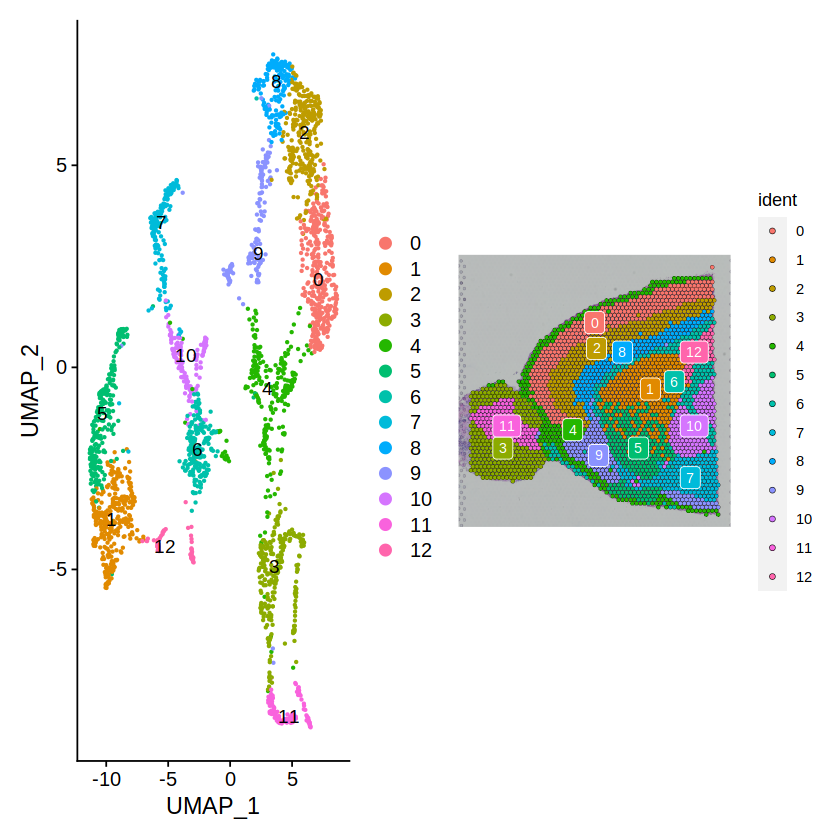

In [10]:
p1 <- DimPlot(brain1, reduction = "umap", label = TRUE)
p2 <- SpatialDimPlot(brain1, label = TRUE, label.size = 3)
p1 + p2

In [15]:
#Rshinny
#LinkedDimPlot(brain1)

In [12]:
# options(repr.plot.width = 20, repr.plot.height = 10)
# SpatialFeaturePlot(brain, features = c("Hpca", "Ttr","Stx1a"))

In [13]:
#Integrated with single-cell
# #Key(object =cortex@images$anterior)
# img<- GetTissueCoordinates(cortex)
# img

ERROR: Error in GetTissueCoordinates(cortex): object 'cortex' not found


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



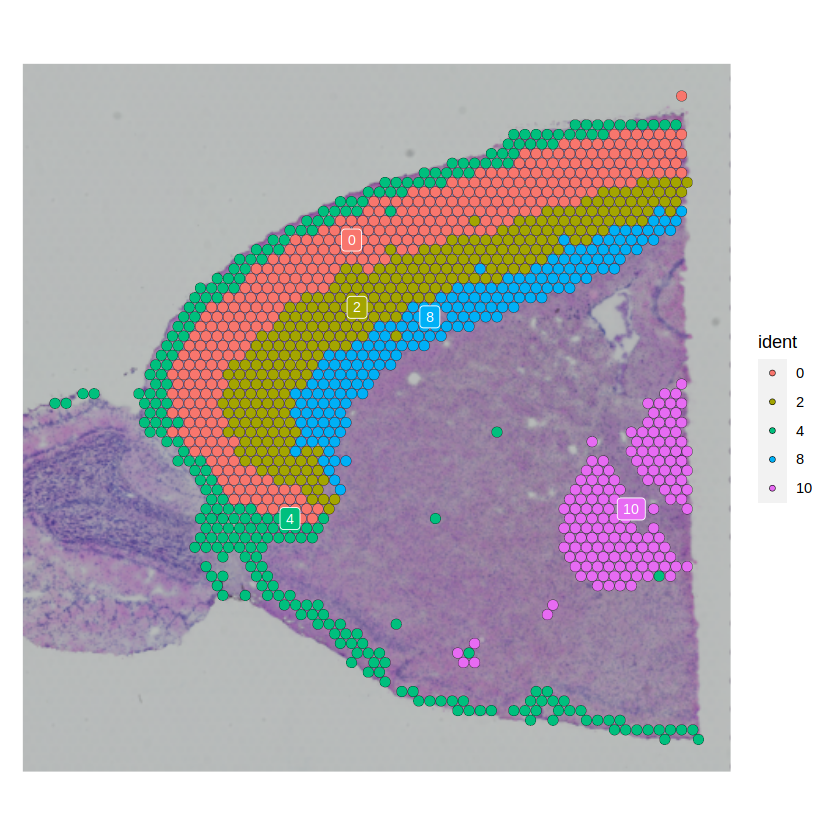

In [16]:

cortex <- subset(brain1, idents = c(0, 2, 4, 8, 10))
p_img <- SpatialDimPlot(cortex, crop = TRUE, label = TRUE, label.size = 3)
p_img
cortex <- subset(cortex, slice1_imagerow > 400 | slice1_imagecol < 150, invert = TRUE)
cortex <- subset(cortex, slice1_imagerow > 275 & slice1_imagecol > 370, invert = TRUE)
cortex <- subset(cortex, slice1_imagerow > 250 & slice1_imagecol > 440, invert = TRUE)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



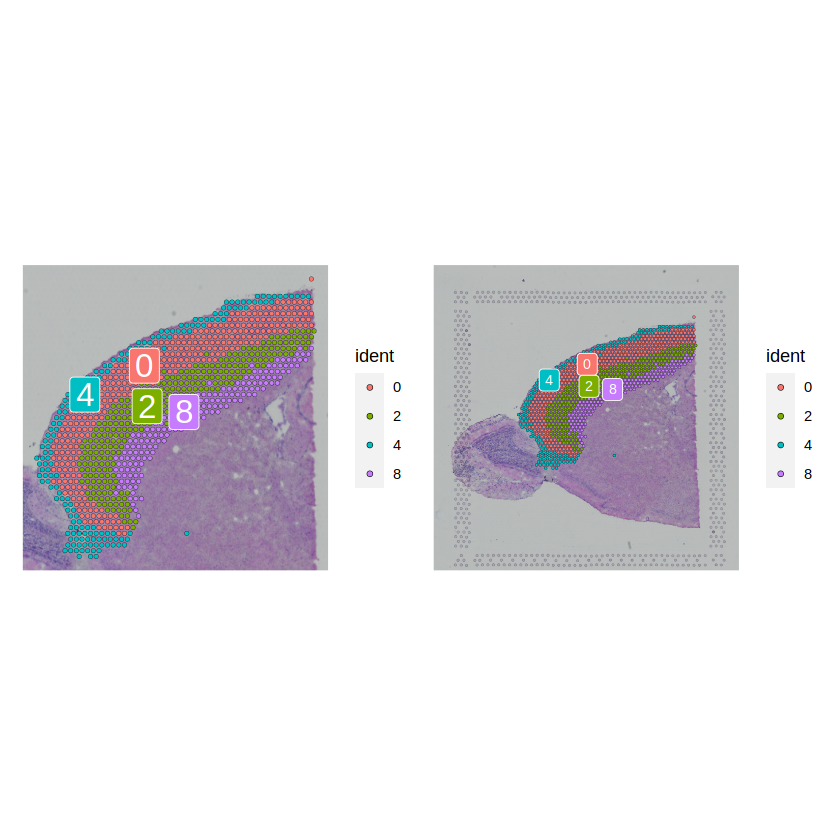

In [17]:
p1 <- SpatialDimPlot(cortex, crop = TRUE, label = TRUE)
p2 <- SpatialDimPlot(cortex, crop = FALSE, label = TRUE, pt.size.factor = 1, label.size = 3)
p1 + p2

17:44:42 UMAP embedding parameters a = 0.9922 b = 1.112

17:44:42 Read 14249 rows and found 30 numeric columns

17:44:42 Using Annoy for neighbor search, n_neighbors = 30

17:44:42 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:44:44 Writing NN index file to temp file /scratch/4650.sched-pace-ice.pace.gatech.edu/Rtmpt5NKRk/file325c50bdd83d

17:44:44 Searching Annoy index using 1 thread, search_k = 3000

17:44:48 Annoy recall = 100%

17:44:49 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:44:50 Found 7 connected components, 
falling back to 'spca' initialization with init_sdev = 1

17:44:50 Using 'irlba' for PCA

17:44:50 PCA: 2 components explained 36.66% variance

17:44:50 Scaling init to sdev = 1

17:44:50 Commencing o

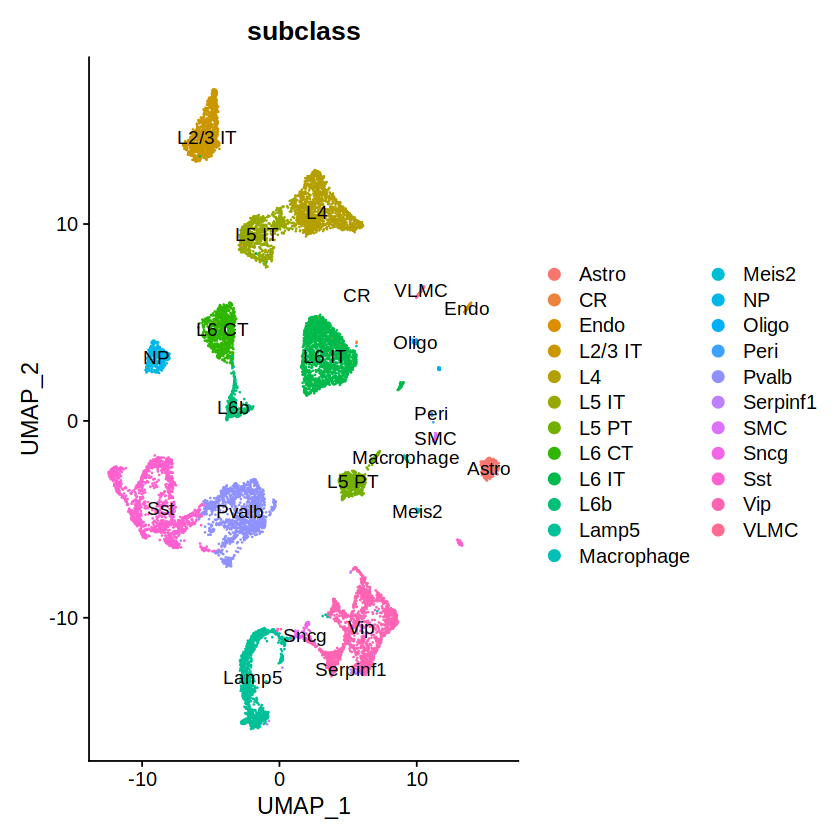

In [20]:
#single-cell
cortex.all<-readRDS("../../shared-classes/materials/biol8803e/team2/song-file/allen_cortex.rds")
cortex.all <- SCTransform(cortex.all, ncells = 3000, verbose = FALSE) %>%
  RunPCA(verbose = FALSE) %>%
  RunUMAP(dims = 1:30)
DimPlot(cortex.all, group.by = "subclass", label = TRUE)


In [21]:
anchors <- FindTransferAnchors(reference = cortex.all, query = cortex,
                               reference.assay = 'SCT', query.assay = 'SCT',
                               , normalization.method = "SCT", verbose = T, reduction = 'cca')
predictions.assay <- TransferData(anchorset = anchors, refdata = cortex.all$subclass, prediction.assay = TRUE,
                                  weight.reduction = cortex[["pca"]], dims = 1:30)
cortex[["predictions"]] <- predictions.assay


Normalizing query using reference SCT model

Warning message:
“Adding image data that isn't associated with any assay present”
Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 3694 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



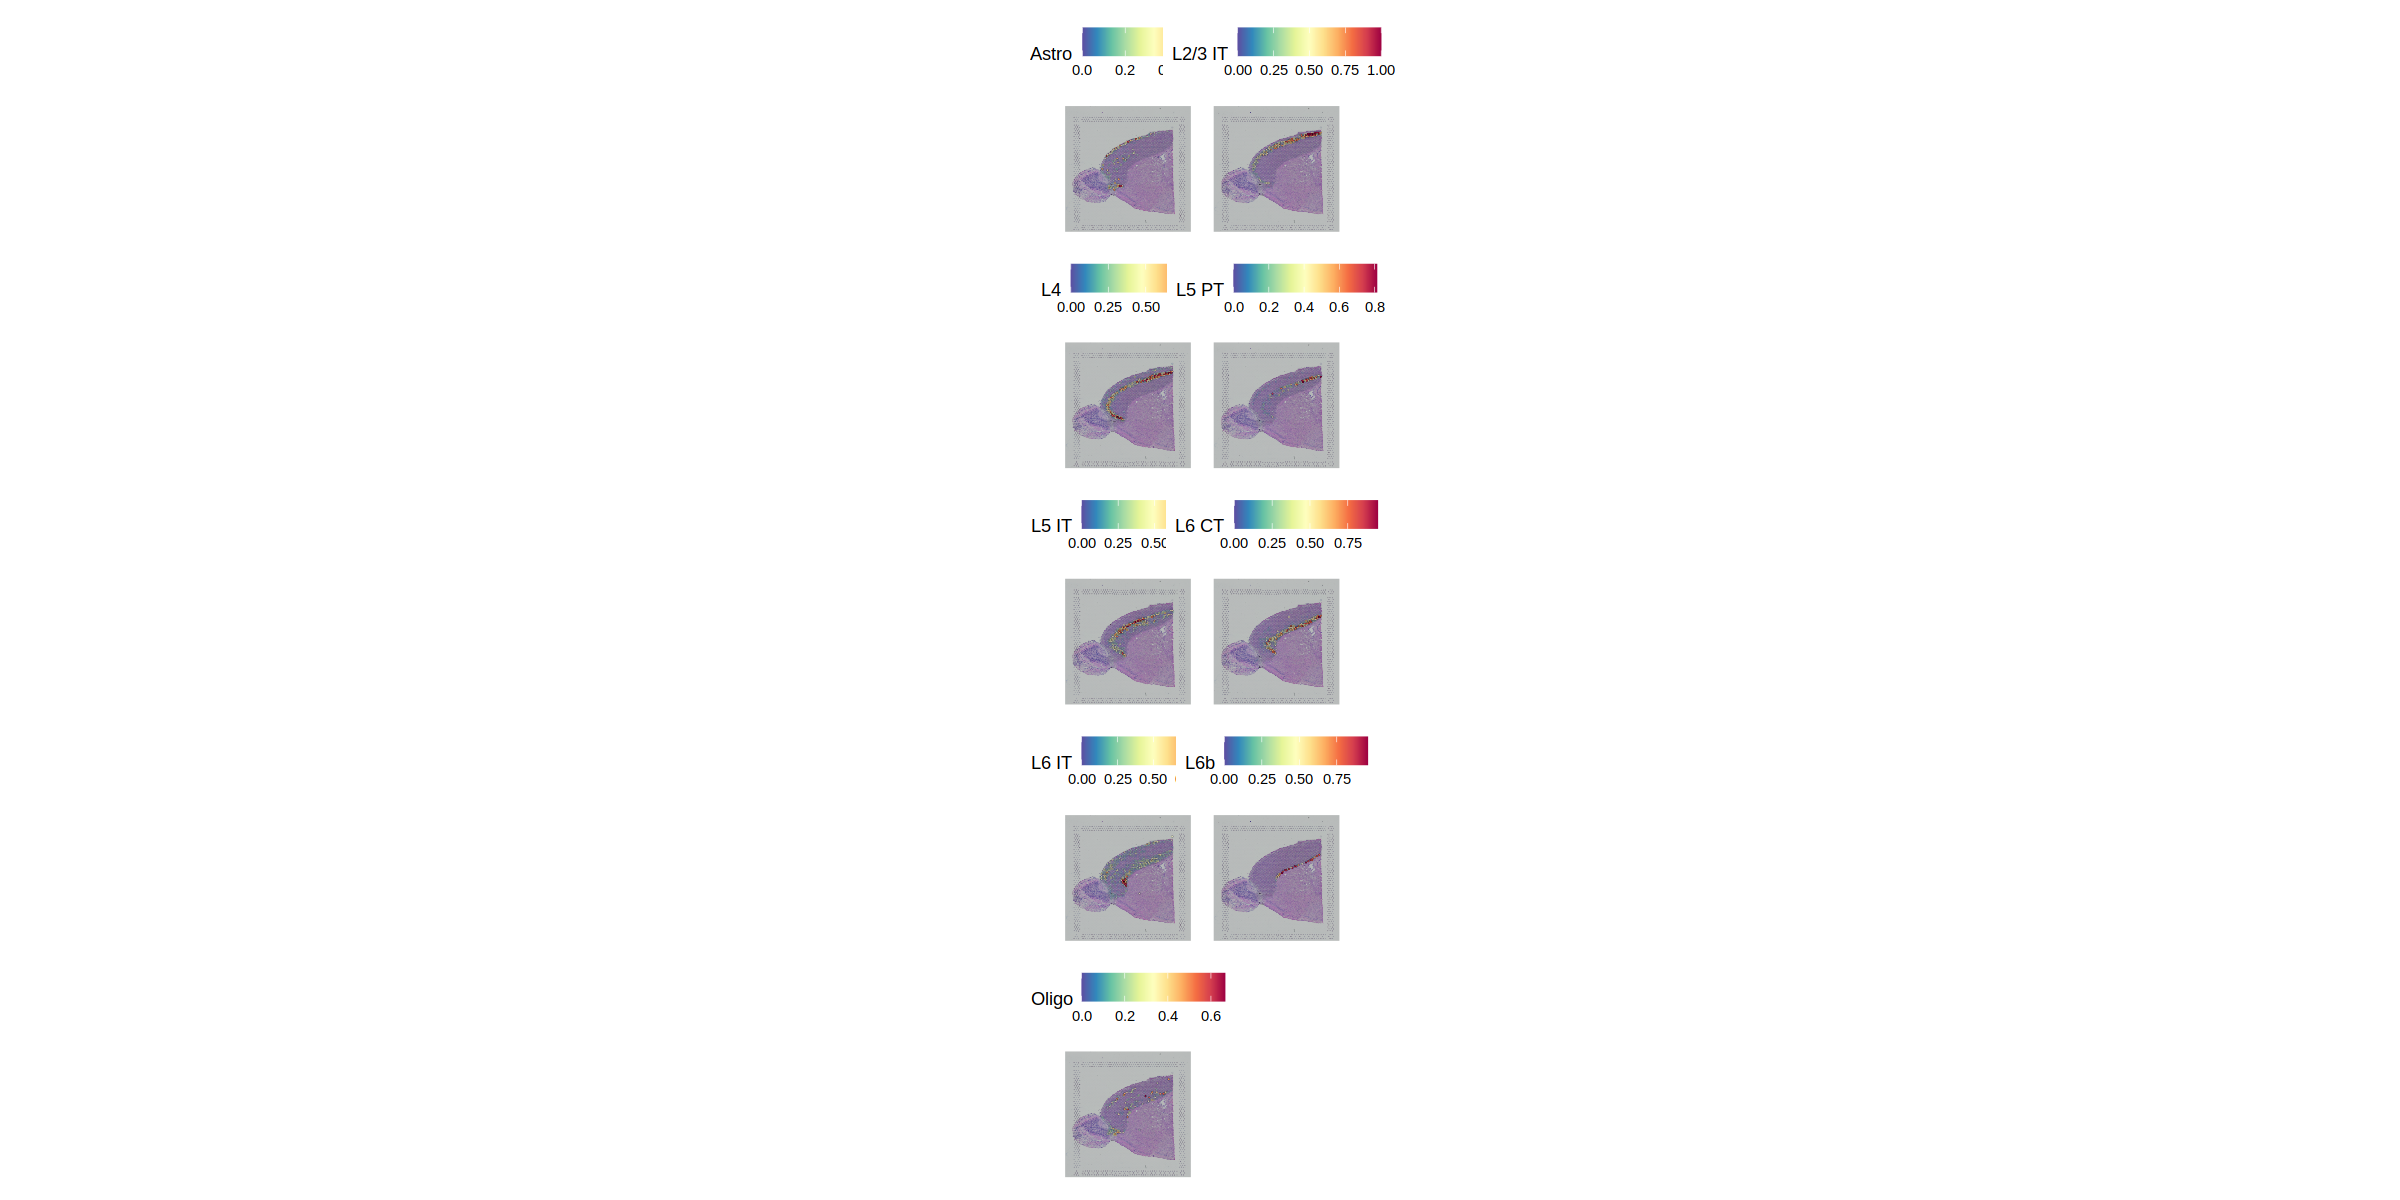

In [22]:
# class distribution in spatial assay
options(repr.plot.width = 20, repr.plot.height = 10)
DefaultAssay(cortex) <- "predictions"
SpatialFeaturePlot(cortex, features = c("Astro", "L2/3 IT", "L4", "L5 PT", "L5 IT", "L6 CT", "L6 IT",
    "L6b", "Oligo"), pt.size.factor = 1.6, ncol = 2, crop = FALSE, alpha = c(0.1, 1))

In [ ]:
#top4 high variable cell type
cortex <- FindSpatiallyVariableFeatures(cortex, assay = "predictions", selection.method = "markvariogram",
    features = rownames(cortex), r.metric = 5, slot = "data")
top.clusters <- head(SpatiallyVariableFeatures(cortex), 4)
SpatialPlot(object = cortex, features = top.clusters, ncol = 2)